# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [2]:
import pandas as pd

df = pd.read_csv('insurance.csv')

print(df.info())

for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'int64' or dtype == 'float64':
        print("Column:", column," Type:", dtype, "(Numerical)")
    else:
        print("Column:", column," Type:", dtype, "(Categorical)")
    

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Column: age  Type: int64 (Numerical)
Column: sex  Type: object (Categorical)
Column: bmi  Type: float64 (Numerical)
Column: children  Type: int64 (Numerical)
Column: smoker  Type: object (Categorical)
Column: region  Type: object (Categorical)
Column: charges  Type: float64 (Numerical)


### Q2. Check whether there are missing values in this dataset.

In [3]:
print(df.shape)

print(df.isnull().sum())

print(df.isnull().sum()/df.shape[0])


(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


##### df.isnull().sum() calculates number of NaN values in each column. Since each collumn has 0 then there are no missing values.

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


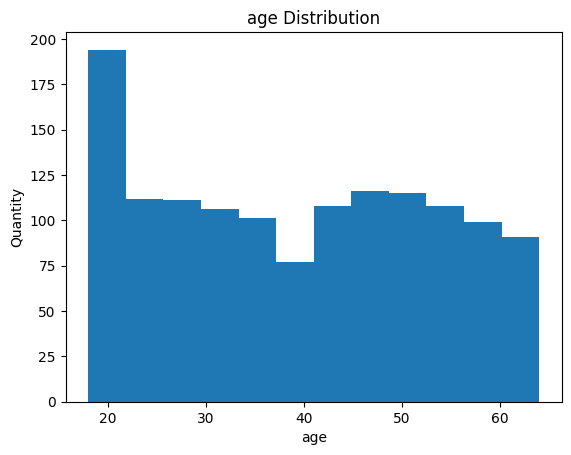

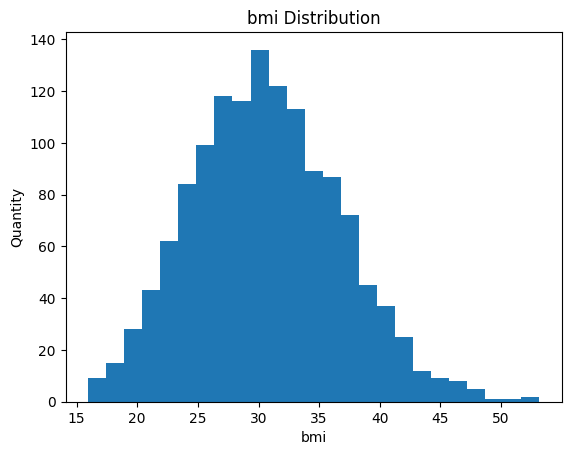

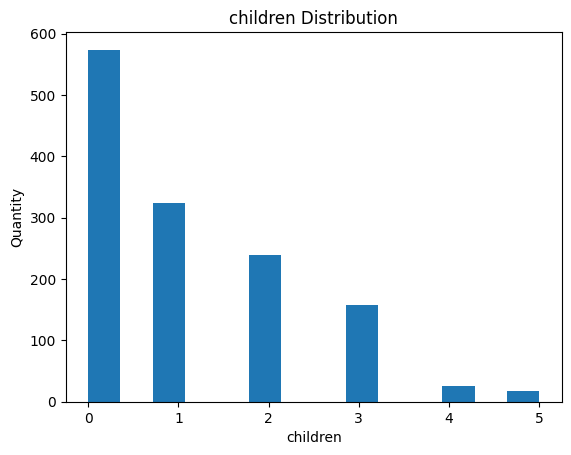

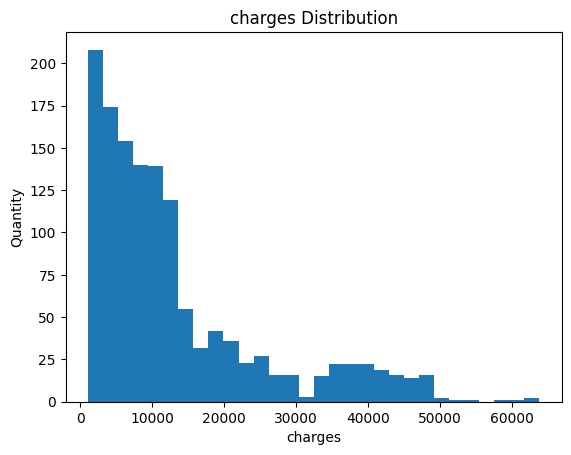

In [4]:
import matplotlib.pyplot as plt

for column in df.columns:
    dtype = df[column].dtype
    if dtype == 'int64' or dtype == 'float64':
        plt.hist(df[column].values, bins = 'auto')
        plt.title(column + " Distribution")
        plt.xlabel(column)
        plt.ylabel("Quantity")
        plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [5]:
#not sure why i have to do the below step since corr() should do this for me
df_num = df.select_dtypes(include=['int64','float64'])

hcorr = df_num.corr()

hcorr.style.background_gradient()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

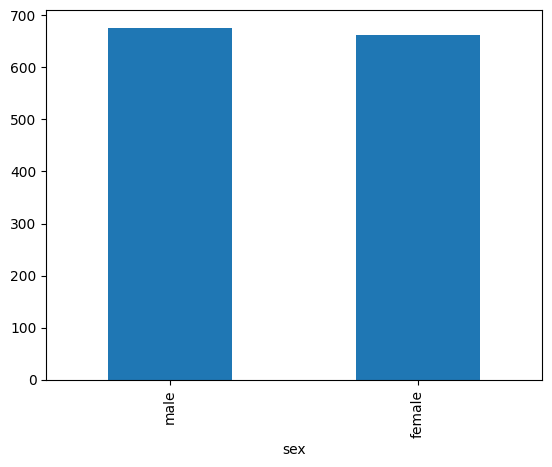

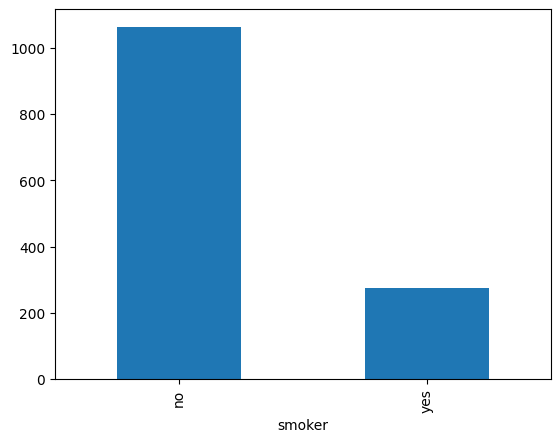

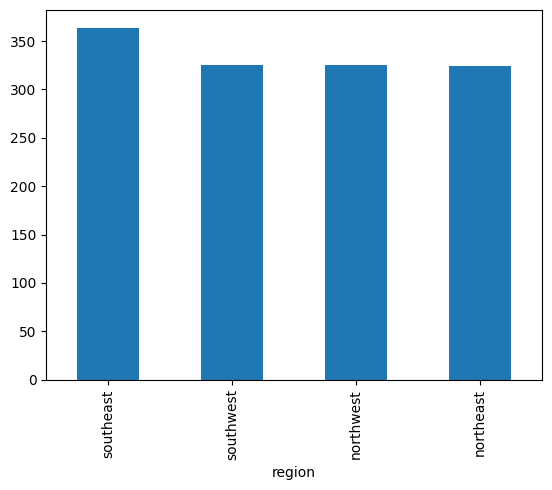

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind = 'bar')
        plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
        print(df[column].value_counts())



sex
1    676
0    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


### Q7. Normalize all numerical features

In [ ]:
import numpy as np

for column in df.columns:
    if df[column].dtype == 'int64' or dtype == 'float64':
        column_mean = np.mean(df[column], axis = 0)
        column_std = np.std(df[column], axis = 0)
        df[column] = (df[column] - column_mean)/column_std
        print("Normalized", column)
        print(df[column].head(), "\n")

Normalized age
0   -1.438764
1   -1.509965
2   -0.797954
3   -0.441948
4   -0.513149
Name: age, dtype: float64 

Normalized sex
0   -1.010519
1    0.989591
2    0.989591
3    0.989591
4    0.989591
Name: sex, dtype: float64 

Normalized bmi
0   -0.453320
1    0.509621
2    0.383307
3   -1.305531
4   -0.292556
Name: bmi, dtype: float64 

Normalized children
0   -0.908614
1   -0.078767
2    1.580926
3   -0.908614
4   -0.908614
Name: children, dtype: float64 

Normalized smoker
0    1.970587
1   -0.507463
2   -0.507463
3   -0.507463
4   -0.507463
Name: smoker, dtype: float64 

Normalized region
0    1.343905
1    0.438495
2    0.438495
3   -0.466915
4   -0.466915
Name: region, dtype: float64 

Normalized charges
0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: charges, dtype: float64 



### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [ ]:
path = 'preprocessed_data.csv'

df.to_csv(path, index = False)